In [2]:
import pandas as pd
import pyreadstat
import sklearn as skl 
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import matplotlib

/home/koki/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [102]:
#from sklearn import tree
#from sklearn.utils import shuffle
#from sklearn.datasets import make_regression
#from sklearn.metrics import confusion_matrix
#from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier      #si
from sklearn.multioutput import MultiOutputRegressor    #si
from sklearn.model_selection import train_test_split    #si
from sklearn.ensemble import GradientBoostingRegressor  #si
from sklearn.ensemble import RandomForestClassifier     #si
from sklearn.tree import DecisionTreeClassifier         #si

In [9]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
#from sklearn import model_selection
#from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
df = pd.read_spss("nacimientos.sav")

In [104]:
df = df[df != "Ignorado"]
df = df[df != "Ignorada"]
df = df.dropna()

In [105]:
df = pd.DataFrame(df)
X = df[['Nacio', 'Sexo','Leyp', 'grocupad', 'edmadrec', 'grocumad', 'IU', 'Mesesemb', 'Hijosten', 'Abortos', 'Medcons']]
y = df[['pesorec', 'estrec']]
#y1 = df[['Estatura', 'Peso']]

# Preparación de los datos para una sola salida

In [135]:
datos = df[['Nacio', 'Sexo','Leyp', 'grocupad', 'edmadrec', 'grocumad', 'IU', 'Mesesemb', 'Hijosten', 'Abortos', 'Medcons']]
peso = df['pesorec']
tamaño = df['estrec']

In [153]:
plt.streamplot(peso)

TypeError: streamplot() missing 3 required positional arguments: 'y', 'u', and 'v'

In [108]:
#plt.plot(peso, 'rs', label='line 1', linewidth=2, markersize=12)

peso.bar()

#plt.title('Peso de los bebes al nacer') 
#plt.xlabel('XLabel')   
#plt.ylabel('Ylabel')
plt.show()

AttributeError: 'Series' object has no attribute 'bar'

In [1]:
plt.hist(datos)
plt.show()

NameError: name 'plt' is not defined

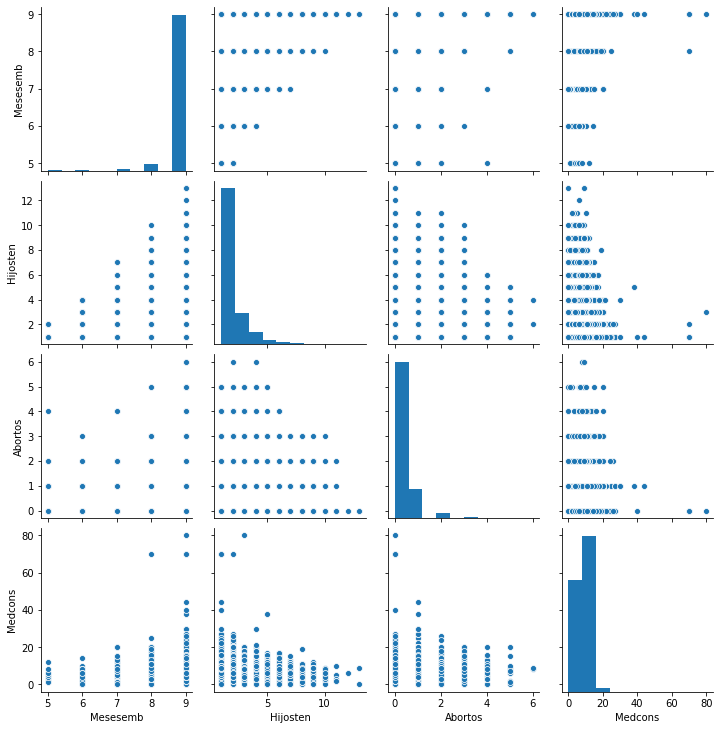

In [121]:
sns.pairplot(datos)

### Transformación a datos dummies

In [7]:
X = pd.get_dummies(X, drop_first=True)
datos = pd.get_dummies(datos, drop_first=True)

### Multi-salida

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

### Peso

In [9]:
X_p_train, X_p_test, Y_p_train, Y_p_test = train_test_split(datos,peso,test_size = 0.2, random_state=42)

### Tamaño

In [10]:
X_t_train, X_t_test, Y_t_train, Y_t_test = train_test_split(datos,tamaño,test_size = 0.2, random_state=42)

# Predicción

### Salida individual

In [26]:
#forest = RandomForestClassifier(random_state=1)
#multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
#multi_target_forest.fit(X_train, y_train).score(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#MultiOutputRegressor(
#    GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).score(X_train, y_train)

### Salida en grupos

In [30]:
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
mgbr = mtf = multi_target_forest.fit(X_train, y_train)
print(mtf.score(X_train, y_train))

0.8195697682812387


In [15]:
MultiOutputRegressor(
    GradientBoostingRegressor(random_state=0)).fit(X_train, y_train).score(X_train, y_train)

ValueError: could not convert string to float: '3500 y más'

# Algoritmos de predicción uni-salida
## (peso)


## Kneighbots

In [14]:
p_pred_knn = KNeighborsClassifier().fit(X_p_train, Y_p_train)
print(KNeighborsClassifier().fit(X_p_train, Y_p_train).score(X_p_train, Y_p_train))

0.5553670685050169


## Decision Tree

In [13]:
p_pred_dtc = DecisionTreeClassifier().fit(X_p_train, Y_p_train)
print(DecisionTreeClassifier().fit(X_p_train, Y_p_train).score(X_p_train, Y_p_train))

0.8255251570057027


# Algoritmos de predicción uni-salida
## (Tamaño)

## Kneighbots

In [26]:
t_pred_knn = KNeighborsClassifier().fit(X_t_train, Y_t_train)
print(t_pred_knn.score(X_t_train, Y_t_train))

0.950877066339421


## Decision Tree Classifier

In [27]:
t_pred_dtc = DecisionTreeClassifier().fit(X_t_train, Y_t_train)
print(t_pred_dtc.score(X_t_train, Y_t_train))

0.9862484660362376


# Guardar modelos

In [34]:
filename = 'Multioutput_model.sav'
joblib.dump(mtf, filename)

['Multioutput_model.sav']

In [35]:
filename = 'altura_model.sav'
joblib.dump(t_pred_dtc, filename)

['altura_model.sav']

In [36]:
filename = 'Peso_model.sav'
joblib.dump(p_pred_dtc, filename)

['Peso_model.sav']

# Cargar Modelos

In [16]:
Multioutput_model = joblib.load('Multioutput_model.sav')
altura_model = joblib.load('altura_model.sav')
peso_model = joblib.load('Peso_model.sav')


# Pruebas

In [17]:
X = df[['Nacio', 'Sexo','Leyp', 'grocupad', 'edmadrec', 'grocumad', 'IU', 'Mesesemb', 'Hijosten', 'Abortos', 'Medcons']]
y = df[['pesorec', 'estrec']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [18]:
prueba = X_test.sample(n=4, random_state=1)
prueba

,Nacio,Sexo,Leyp,grocupad,edmadrec,grocumad,IU,Mesesemb,Hijosten,Abortos,Medcons
50298,Solo,Hombre,Madre casada o padre presente,Técnicos y profesionales de nivel medio,30 - 34,Profesionales científicas e intelectuales,Urbano,9,3.0,0,7
26478,Solo,Hombre,Madre casada o padre presente,Ocupaciones elementales,30 - 34,"Oficiales, operarias y artesanas de artes mecá...",Urbano,9,2.0,0,6
16734,Solo,Hombre,Padre no declarado,Padre no declarado,20 - 24,Estudiante,Predominantemente rural,9,1.0,0,4
23714,Solo,Mujer,Madre casada o padre presente,Técnicos y profesionales de nivel medio,30 - 34,Trabajadoras de los servicios y vendedoras de ...,Urbano,9,1.0,0,10


In [19]:
prueba_t = y_test.sample(n=4, random_state=1)
prueba_t

,pesorec,estrec
50298,3500 y más,45 - 54
26478,3000 - 3400,45 - 54
16734,2500 - 2999,45 - 54
23714,3000 - 3400,45 - 54


In [20]:
prueba = pd.get_dummies(prueba, drop_first=True)

In [21]:
peso_model.predict(prueba)

array(['3000 - 3400', '2000 - 2499', '3000 - 3400', '3000 - 3400'],
      dtype=object)

In [22]:
peso_model.predict(prueba)

array(['3000 - 3400', '2000 - 2499', '3000 - 3400', '3000 - 3400'],
      dtype=object)

In [23]:
altura_model.predict(prueba)

array(['45 - 54', '45 - 54', '45 - 54', '45 - 54'], dtype=object)

In [25]:
Multioutput_model.predict(prueba)

array([['3000 - 3400', '45 - 54'],
       ['2000 - 2499', '45 - 54'],
       ['3000 - 3400', '45 - 54'],
       ['3500 y más', '45 - 54']], dtype=object)